### **Name:** JOSEPH-MARIE NGUEPONWOUO

# **COMPUTER PROBLEM SET 1.2**

# **SIMULATION OF THE BROWNIAN MOTION**
*Our objective is to simulate a discretization of a Brownian motion $W$, and to study some properties.*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
T = 1

## 1. Forward simulation of {${W_{t_{1}^n},..., W_{t_{n}^n}}$}

(a) Justify that $W_{t_{i}^n} = W_{t_{i-1}^n} + Z_{i}\sqrt{ΔT}$ where $(Z_{i})_{1≤i\leq2^{n}}$ is an iid family of $\mathcal{N}(0,\,1)$

$\{W_t\}$ is a standard brownian motion process. By definition of Brownian motion, the increments $W_{t_{i}^n}-W_{t_{i-1}^n}$ for $1\leq i \leq2^{n}$ ($i \in \mathbb{N}$) are independent and follow a normal distribution $\mathcal{N}(0,\,ΔT) = \sqrt{ΔT} \mathcal{N}(0,\,1) = Z_{i}$ where $Z_{i} \sim \mathcal{N}(0,\,1)$.

Hence, the $Z_{i}$ are iid variables that satisfy the relation:
$$W_{t_{i}^n} = W_{t_{i-1}^n} + Z_{i}\sqrt{ΔT} \ with\ i ∈ {1, ..., 2^{n}}$$

(b) Draw a sample of 1000 copies of the discretized Brownian motion {${W_{t_{1}^n},..., W_{t_{n}^n}}$}

In [ ]:
def forward(n, T, shape=None):
    """
    Simulate a set trajectories of the standard brownian motion using
    the time step t_i = T*k/2^n.
    n (int): log2-size of the mesh
    T (float): time horizon
    shape (tuple[int]): shape of the set of brownian motions we want
    """
    dt = T*2**(-n)
    if isinstance(shape, tuple):
        zi = np.random.randn(2**n, *shape)
    else:
        zi = np.random.randn(2**n)
    zi = np.sqrt(dt)*zi
    res = np.cumsum(zi, axis=0)
    return res

(1024, 1000)


Text(0.5, 1.0, 'Forward simulation of Brownian motion')

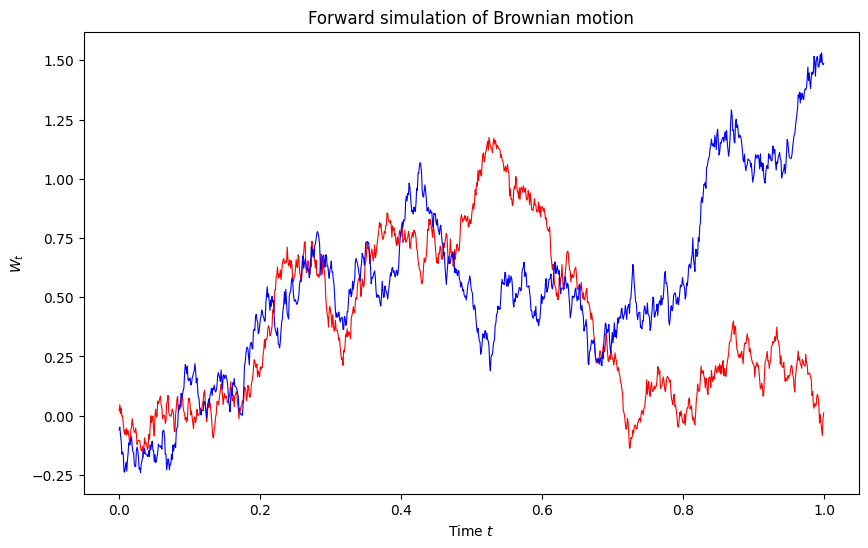

In [ ]:
n = 10
plt.figure(figsize=(10,6), dpi=100)
tin = np.arange(0, T, 2**(-n))
samples = forward(n, T, (1000,))
print(samples.shape)
plt.plot(tin, samples[:,0], 'r-', linewidth=0.8)
plt.plot(tin, samples[:,1], 'b-', linewidth=0.8)
plt.xlabel("Time $t$")
plt.ylabel("$W_t$")
plt.title("Forward simulation of Brownian motion")

### (c) Compute the corresponding sample mean and variance of $W_{T}$, and the sample covariance of ($W_{T}, W_{T/2}$)


We have : $\sum_{i=1}^{2^{n}} W_{t_{i}^n}-W_{t_{i-1}^n} = \sum_{i=1}^{2^n} Z_{i}\sqrt{ΔT}$

$$W_{T} = \sqrt{ΔT} \sum_{i=1}^{2^{n}} Z_{i}$$

Hence, $$\mathbb{E}[W_{T}] = \sqrt{ΔT} \sum_{i=1}^{2^{n}} \mathbb E [Z_{i}] = 0$$ Because  $(Z_{i})_{1≤i\leq2^{n}}$ is an iid family of $\mathcal{N}(0,\,1)$.

### - Variance of $W_{T}$

$$\mathbb Var[W_{T}] = \mathbb Var[\sqrt{ΔT}\sum_{i=1}^{2^{n}}Z_{i}]$$
So, $$\mathbb Var[W_{T}] = {ΔT}\sum_{i=1}^{2^{n}} \mathbb Var[Z_{i}]$$
By independence of the family $(Z_{i})_{1≤i\leq2^{n}}$.
Conclusion,

$$\mathbb Var[W_{T}] = {ΔT}\sum_{i=1}^{2^{n}} 1 = 2^{n}{ΔT} = T $$

### - Covariance of ($W_{T}, W_{T/2}$)

$$\mathrm{Cov}(W_{T}, W_{T/2}) = \mathrm{Cov}(W_{T}-W_{T/2}+W_{T/2}, W_{T/2}) = \mathrm{Cov}(W_{T}-W_{T/2}, W_{T/2}) + \mathrm{Cov}(W_{T/2}, W_{T/2})$$

Independence between $W_{T}-W_{T/2}$ and $W_{T/2}$ $ \Rightarrow$ $\mathrm{Cov}(W_{T}-W_{T/2}, W_{T/2})=0$

So, $$\mathrm{Cov}(W_{T}, W_{T/2}) = \mathrm{Cov}(W_{T/2}, W_{T/2}) = \mathbb Var[W_{T/2}] =T/2$$


In [ ]:
# Compute samples mean, variance for varying n
## Forward simulation
Nmin = 5
Nmax = 15
mu_vals = []
sigma_vals = []
cov_vals = []

for n in range(Nmin, Nmax):
    print("Values for n =", n)
    print("Time-step Resolution: %s" % 2**n)
    samples = forward(n, T, (1000,))

    mu = np.mean(samples[-1])
    mu_vals.append(mu)
    print("Mean: %s" % mu)

    sigma2 = np.var(samples[-1], ddof=1)
    sigma_vals.append(sigma2)
    print("Variance: %s" % sigma2)

    covar = np.cov(samples[-1], samples[2**(n-1)])
    cov_vals.append(covar[0,1])
    print("Covariance of (WT, WT/2): %s" % covar[0,1])
    print()
    print("#"*50)
    print()

Values for n = 5
Time-step Resolution: 32
Mean: 0.016866537957276474
Variance: 0.989495895717317
Covariance of (WT, WT/2): 0.5132783902678423

##################################################

Values for n = 6
Time-step Resolution: 64
Mean: -0.018335704297643803
Variance: 1.0038684430382396
Covariance of (WT, WT/2): 0.5063268054987551

##################################################

Values for n = 7
Time-step Resolution: 128
Mean: -0.0028617962229696625
Variance: 1.035653514551321
Covariance of (WT, WT/2): 0.534254986488496

##################################################

Values for n = 8
Time-step Resolution: 256
Mean: -0.03821366080274899
Variance: 0.96516536526202
Covariance of (WT, WT/2): 0.49408608506154755

##################################################

Values for n = 9
Time-step Resolution: 512
Mean: 0.036153102637087764
Variance: 0.9759283672734467
Covariance of (WT, WT/2): 0.48663112282781246

##################################################

Values for n = 10

We observe first of all that increasing the value of n a decrease of the value of covariance to T/2, then it starts increasing for n = 14.

Text(0.5, 0, 'Log2-sample size $n$')

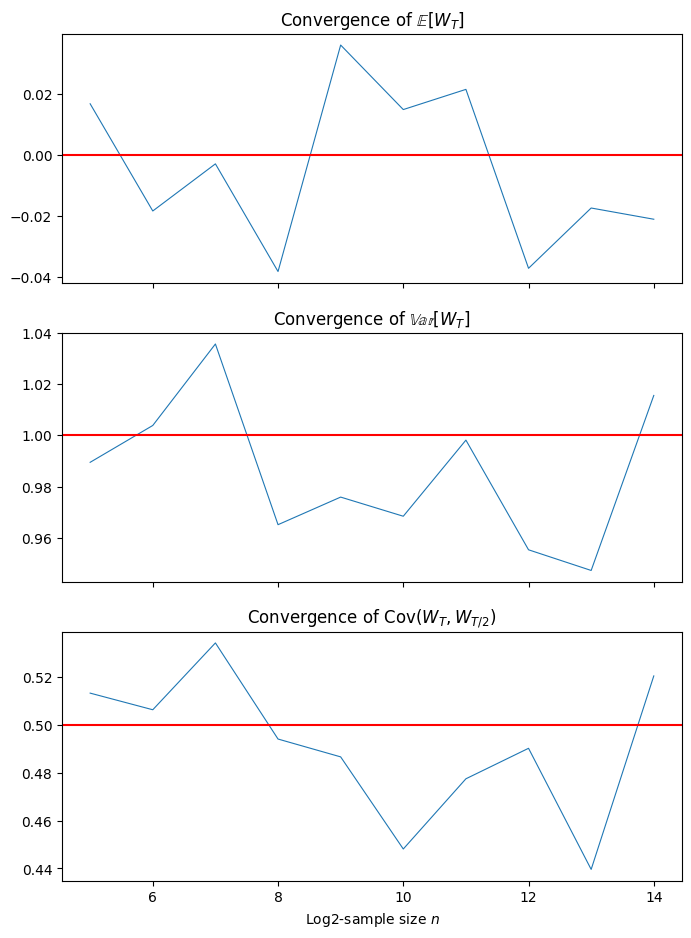

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(8,11), dpi=100, sharex=True)

my_style = {
    'linewidth': 0.8
}

n_sizes = range(Nmin, Nmax)
axes[0].plot(n_sizes, mu_vals, **my_style)
axes[0].axhline(0, 0, T, color='r')
axes[0].set_title(r"Convergence of $\mathbb{E}[W_{T}]$")

axes[1].plot(n_sizes, sigma_vals, **my_style)
axes[1].axhline(T, 0, T, color='r')
axes[1].set_title(r"Convergence of $\mathbb{Var}[W_{T}]$")

axes[2].plot(n_sizes, cov_vals, **my_style)
axes[2].axhline(T/2, 0, T, color='r')
axes[2].set_title(r"Convergence of $\mathrm{Cov}(W_T, W_{T/2})$")
axes[2].set_xlabel("Log2-sample size $n$")

**Conclusion:** Increasing the value of n doesn't lead us to a better solution.

2. Backward Simulation of {${W_{t_{1}^n},..., W_{t_{n}^n}}$}

(a) Justify that $W_{\bar{s}} \vert (W_{s_{1}} = x_{1}, W_{s_{2}} = x_{2})$ has a Gaussian distribution with conditional mean $\bar{x} = \frac{x_{1}+x_{2}}{2}$ and conditional variance $\frac{s_{2}-s_{1}}{4}$

First of all, it's easy to find the mean and the variance of the random variable $W_{s_{1}}|W_{s_{2}}$ by considering two randoms variables $Z_{1}$ and $Z_{2}$ so that :
$$Z_{1}, Z_{2} \sim \mathcal{N}(0, 1)$$

Then, we have:

$$W_{s_{2}} = {\sqrt{s_{2}}}Z_{2}$$
$$W_{s_{1}} = \frac{s_1} {\sqrt{s_{2}}} Z_{2} + \sqrt{{s_1}-\frac{s_1^2} {s_{2}}}Z_{1}$$

$$\mathbb E[W_{s_{1}}|W_{s_{2}}] = \frac{s_{1}}{s_{2}} W_{s_{2}}, \mathbb Var[W_{s_{1}}|W_{s_{2}}] = s_{1}(1-\frac{s_{1}}{s_{2}} )$$

\\


We compute the characteristic function of $W_{\bar s}\,|\, (W_{s_1}=x_1, W_{s_2}=x_2)$:
$$
\begin{aligned}
    \mathbb E\left[ e^{iuW_{\bar s}} \middle| W_{s_1}=x_1, W_{s_2}=x_2 \right]
    &=
    e^{iu\bar x}\mathbb E\left[ \exp\left(iu \left(W_{\bar s}-\frac{W_{s_1} + W_{s_2}}{2}\right)\right) \middle| W_{s_1}=x_1, W_{s_2}=x_2 \right]  \\
    &= e^{iu\bar x}\mathbb E\left[ e^{-iu(W_{\bar s} - W_{s_1})/2} e^{-iu(W_{\bar s}-W_{s_2})/2} \middle| W_{s_1}=x_1, W_{s_2}=x_2 \right] \\
    &= e^{iu\bar x} e^{-\frac 12u^2(\bar s - s_1)/4} e^{-\frac12u^2(s_2 - \bar s)/4} \ \text{(Independence of increments)} \\
    &= \exp\left(iu\bar x - \frac 12 u^2\frac{s_2 - s_1}4\right)
\end{aligned}
$$


Hence, the variable has conditional distribution $\mathcal N(\bar x, \frac{s_2-s_1}{4})$.

The same can be said of $W_{\bar s}\,|\, (W_{s_1}=x_1, W_{s_2}=x_2, (W_u)_{u\not\in[s_1,s_2]})$, as the same computation as above will work.

(b) Justify that the conditional distribution of $W_{\bar s}\,|\, (W_{s_1}=x_1, W_{s_2}=x_2, (W_u)_{u\not\in[s_1,s_2]})$ is $\mathcal N(\bar x, \frac{s_2-s_1}{4})$.


Given the fact that the additional conditioning is  $(W_u)_{u\not\in[s_1,s_2]})$, the $σ-algebra$ of conditioning will just be bigger and the elements into the expectation will still be measurable and we will have the independence of the increments like done above. The result will then be the same.

(c) Backward simulation of the discretized Brownian motion

In [23]:
def backward(n, T):
    res = np.zeros(2**n+1)
    dt = T*2**(-n)
    res[2**n] = np.random.normal(0, np.sqrt(T))
    """
    if debug:
        print("Index k goes from %d to %d" % (0, 2**n))
    """
    # Iterate through the "floors" of the graph.
    for k in range(1, n+1):
        p = n-k
        """
        if debug:
            print('Resolution p=%d' % p)
        """
        for i in range(2**(k-1)):
            s1 = i*2**(p+1)
            s2 = (i+1)*2**(p+1)
            ti = int((s1+s2)/2)
            """
            if debug:
                print("  i=%d" % i, end='')
                print('  time %d, extremities s1=%d and s2=%d' % (ti, s1, s2))
            """
            ws1 = res[s1]
            ws2 = res[s2]
            # Get the variance of the midpoint-time sample
            sig2 = (s2-s1)*dt/4
            res[ti] = np.random.normal((ws1+ws2)/2, np.sqrt(sig2))
    return res[1:]

Text(0.5, 1.0, 'Time-backward simulation of standard brownian motion')

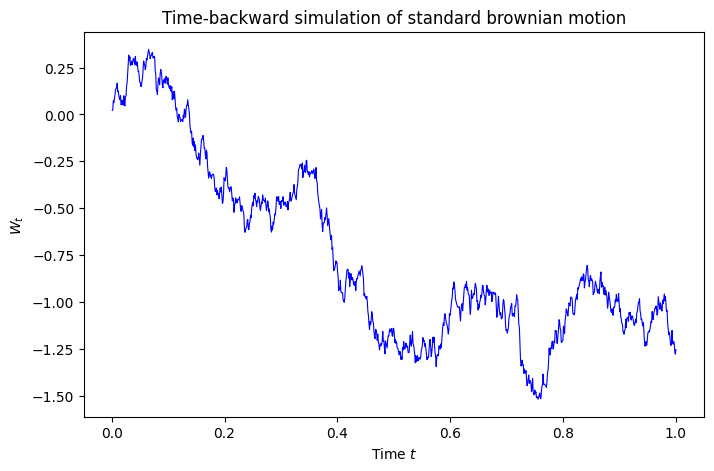

In [24]:
n = 10
Wt = backward(n, T)
plt.figure(figsize=(8,5), dpi=100)
tin = np.linspace(0, T, 2**n+1, endpoint=True)[1:]
plt.plot(tin, Wt, 'b-', linewidth=0.8)
plt.xlabel("Time $t$")
plt.ylabel("$W_t$")
plt.title("Time-backward simulation of standard brownian motion")

(d) Compute the corresponding sample mean and variance of $W_{T}$, and sample covariance of ($W_{T}, W_{T/2}$)

In [26]:
# Compute samples mean, variance for varying n
## Backward simulation
Nmin = 5
Nmax = 15
mu_vals = []
sigma_vals = []
cov_vals = []

print("BACKWARD SIMULATION ALGORITHM")
print("================")
for n in range(Nmin, Nmax):
    print("Values for n =", n)
    print("Time-step Resolution: %s" % 2**n)
    samples = [backward(n, T) for _ in range(1000)]
    samples = np.stack(samples).T

    mu = np.mean(samples[-1])
    mu_vals.append(mu)
    print("Mean: %s" % mu)

    sigma2 = np.var(samples[-1], ddof=1)
    sigma_vals.append(sigma2)
    print("Variance: %s" % sigma2)

    covar = np.cov(samples[-1], samples[2**(n-1)])
    cov_vals.append(covar[0,1])
    print("Covariance of (WT, WT/2): %s" % covar[0,1])
    print()
    print('#'*50)
    print()

BACKWARD SIMULATION ALGORITHM
Values for n = 5
Time-step Resolution: 32
Mean: 0.042740095991032775
Variance: 1.0251062609799746
Covariance of (WT, WT/2): 0.5363409211946194

##################################################

Values for n = 6
Time-step Resolution: 64
Mean: 0.059255013052699805
Variance: 0.9938735406511543
Covariance of (WT, WT/2): 0.4998664757754907

##################################################

Values for n = 7
Time-step Resolution: 128
Mean: 0.008875910752212888
Variance: 0.9868529059673694
Covariance of (WT, WT/2): 0.5356121793237605

##################################################

Values for n = 8
Time-step Resolution: 256
Mean: -0.04597087101494347
Variance: 0.9533730333149141
Covariance of (WT, WT/2): 0.49421360862548047

##################################################

Values for n = 9
Time-step Resolution: 512
Mean: 0.028291993469155376
Variance: 0.9765555196144124
Covariance of (WT, WT/2): 0.4833140146709483

######################################

3. Using successively the forward and backward simulated samples, compute an approximation of $QV^n(W)_T$, the quadratic variation of the Brownian motion along the partition $(t_i)^{n}_i$. Provide two graphs displaying the departure from the limit $T$ as a function of $n \in$ {10, ..., 20}



### - **Forward Simulated Samples**

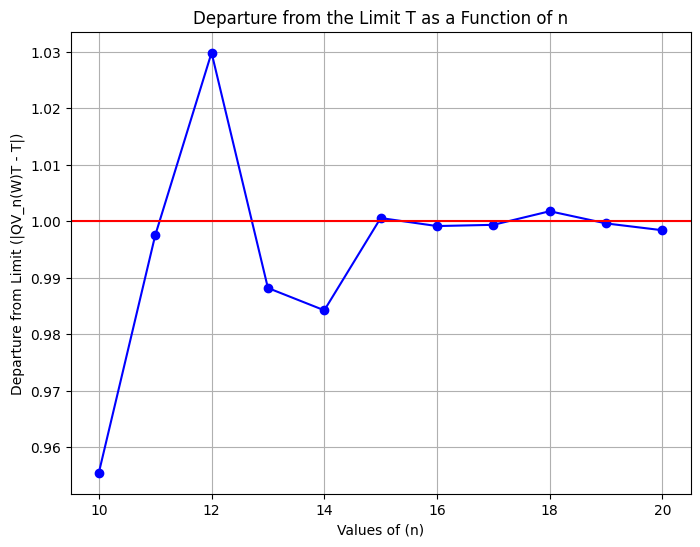

In [48]:
n_values = range(10, 21)
def quadratic_variation(trajectories, T, n):
    result = 0
    for i in range (1,len(trajectories)):
        result += (trajectories[i]-trajectories[i-1])**2
    return result

departures = [quadratic_variation(forward(n, T), T, n) for n in n_values]

# Plot the departures as a function of n
plt.figure(figsize=(8, 6))
plt.plot(n_values, departures, marker='o', linestyle='-', color='b')
plt.xlabel('Values of (n)')
plt.ylabel('Departure from Limit $QV^{n}(W)_T$')
plt.axhline(y=1, color='red', linestyle='-', label='y = 1')
plt.title('Departure from the Limit T as a Function of n')
plt.grid(True)
plt.show()

### - **Backward Simulated Samples**

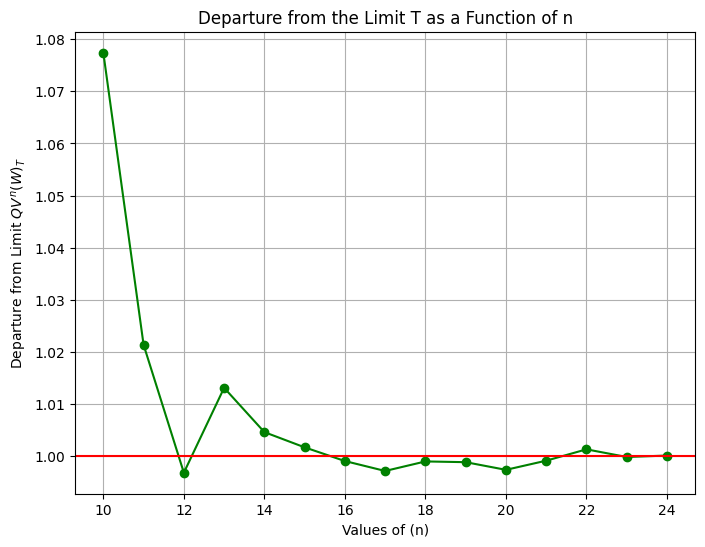

In [57]:
n_values = range(10, 25)
def quadratic_variation(trajectories, T, n):
    result = 0
    for i in range (1,len(trajectories)):
        result += (trajectories[i]-trajectories[i-1])**2
    return result

departures = [quadratic_variation(backward(n, T), T, n) for n in n_values]

# Plot the departures as a function of n
plt.figure(figsize=(8, 6))
plt.plot(n_values, departures, marker='o', linestyle='-', color='g')
plt.xlabel('Values of (n)')
plt.ylabel('Departure from Limit $QV^{n}(W)_T$')
plt.axhline(y=1, color='red', linestyle='-', label='y = 1')
plt.title('Departure from the Limit T as a Function of n')
plt.grid(True)
plt.show()

**Remark:** We observe that the quadratic variation tends to its theoretic value as n increase. It makes sense because the quadration variation is equal to the limit of the sum of increments squared when the step tends to 0.